## DYNAMIC WORKOUT PLAN GENERATOR PROJECT

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib


# Preparing the dataset

In [2]:
df = pd.read_csv('aw_fb_data.csv')
print(df.head())

   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

Data pre-processing

In [4]:
# Checking null values
print(df.isnull().sum())

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


In [5]:
print(df.describe())

        Unnamed: 0           X1          age       gender       height  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean   3132.500000  1771.144317    29.158525     0.476533   169.709052   
std    1808.405375  1097.988748     8.908978     0.499489    10.324698   
min       1.000000     1.000000    18.000000     0.000000   143.000000   
25%    1566.750000   789.750000    23.000000     0.000000   160.000000   
50%    3132.500000  1720.000000    28.000000     0.000000   168.000000   
75%    4698.250000  2759.250000    33.000000     1.000000   180.000000   
max    6264.000000  3670.000000    56.000000     1.000000   191.000000   

            weight        steps    hear_rate     calories     distance  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean     69.614464   109.562268    86.142331    19.471823    13.832555   
std      13.451878   222.797908    28.648385    27.309765    45.941437   
min      43.000000     1.000000     2

In [6]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 0', 'X1'], inplace=True)

# Exploratory Data Analysis

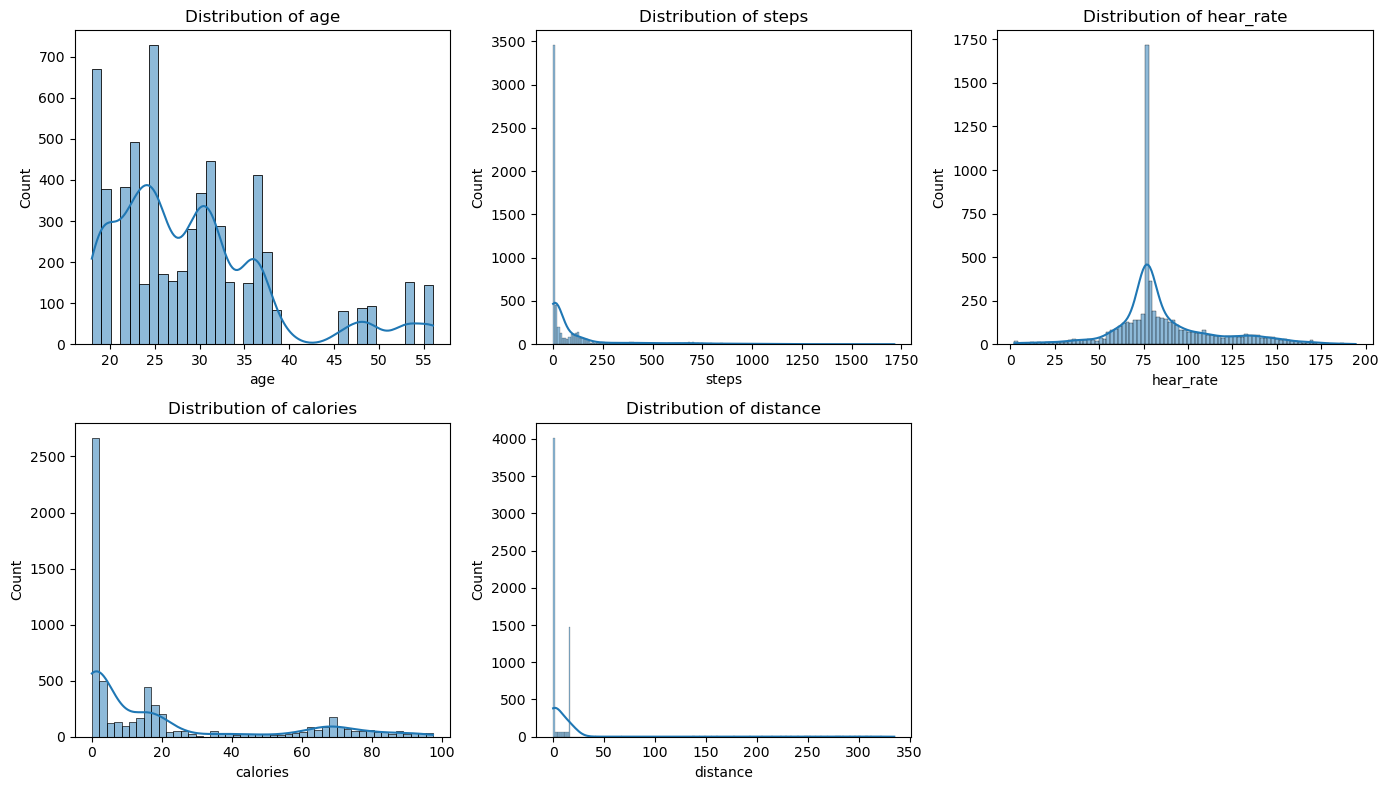

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for i, column in enumerate(['age', 'steps', 'hear_rate', 'calories', 'distance']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Inference : 
1. Age 
- The age distribution is slightly skewed towards younger age groups, with the majority of the users falling between 20 and 35 years old.
- There's a decline in the count as age increases beyond 40.
- This indicates that younger individuals are more engaged with fitness tracking or using wearables.

2. Steps 
- The steps distribution is heavily right-skewed. Most users have a low step count.
- This suggests that a large portion of users record only a small number of steps daily.

3. Heart Rate
- The heart rate distribution shows a peak around 70-80 beats per minute, which is typical for resting heart rates in most individuals.

4. Calories
- The calorie distribution is also highly skewed, with most users burning a low number of calories.

5. Distance
- The distance distribution is similar to that of the steps. Most users cover very short distances daily.

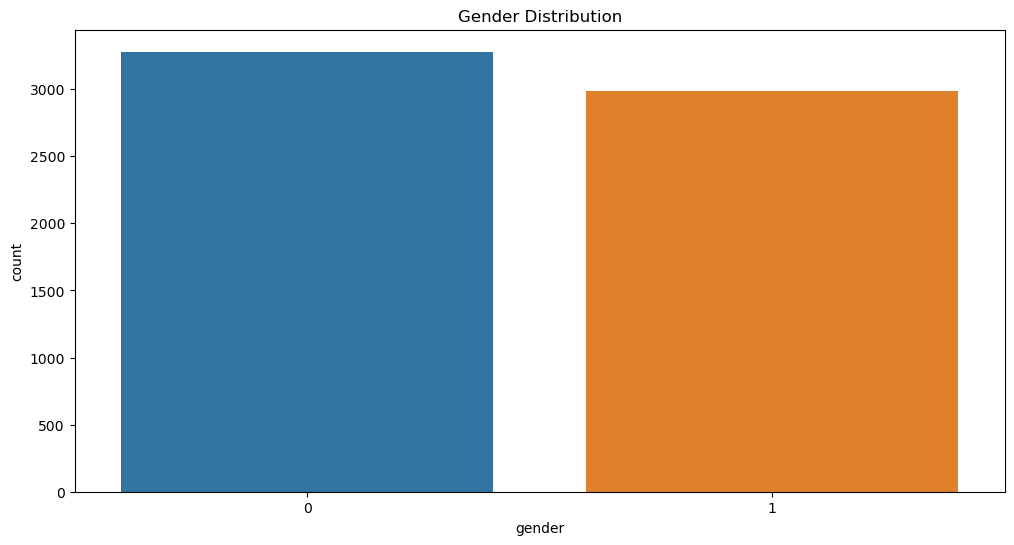

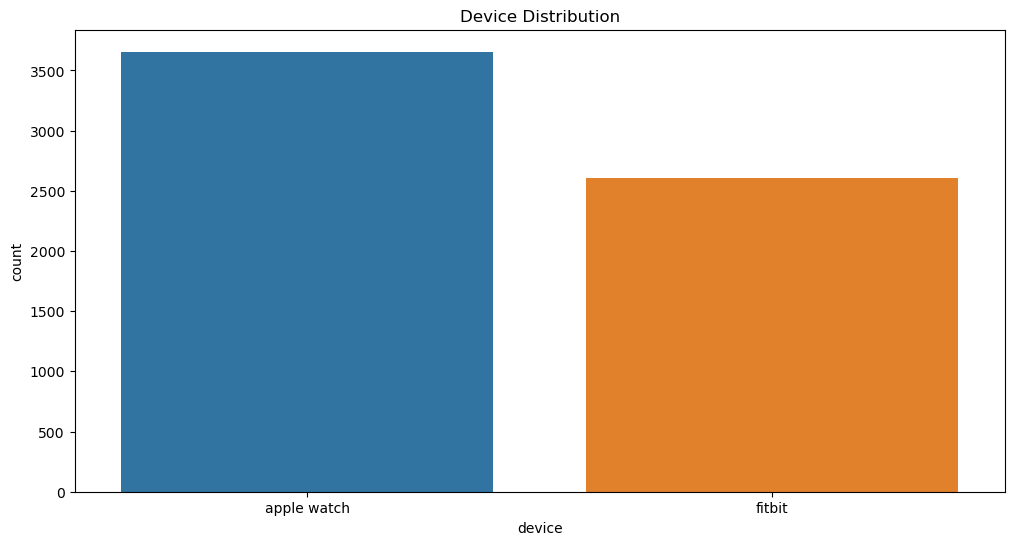

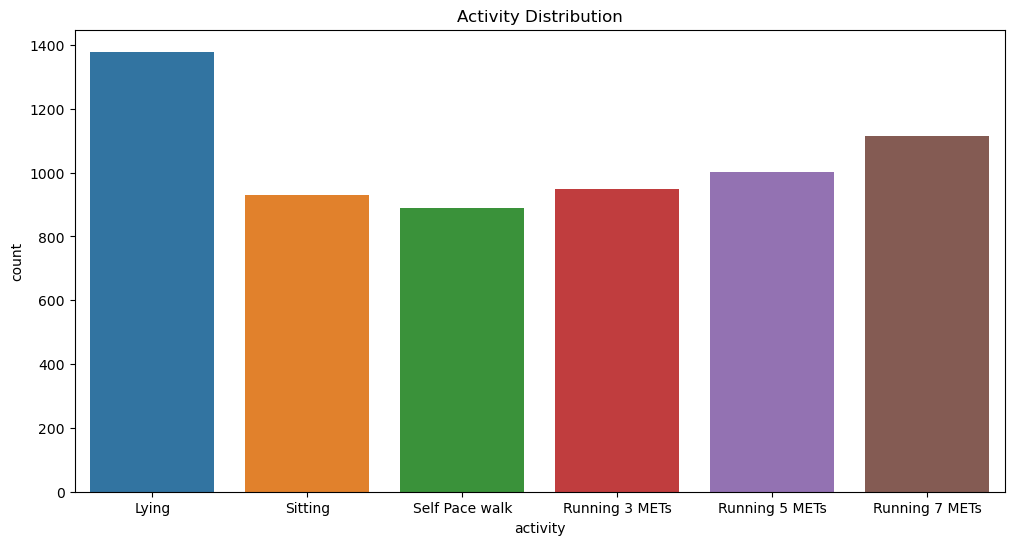

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='device')
plt.title('Device Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='activity')
plt.title('Activity Distribution')
plt.show()

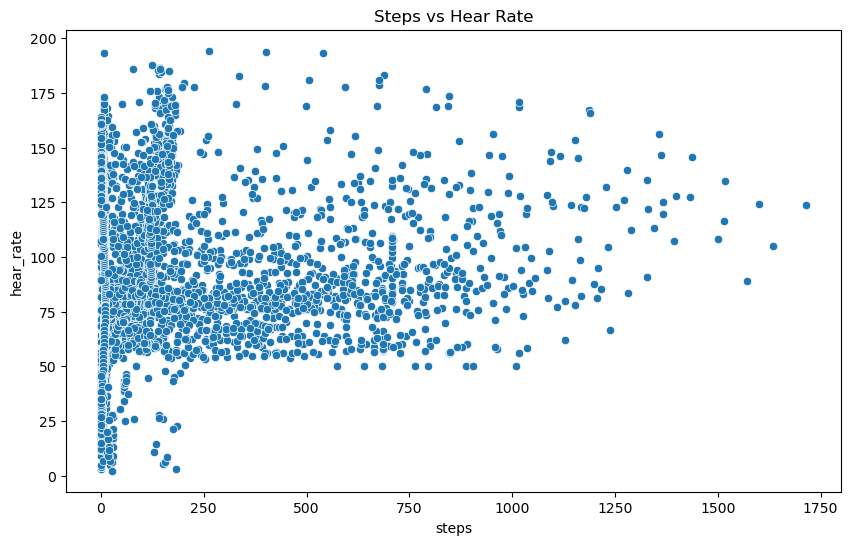

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='steps', y='hear_rate')
plt.title('Steps vs Hear Rate')
plt.show()

The trend shows that as step count increases, heart rate tends to rise, which is expected during physical activity.

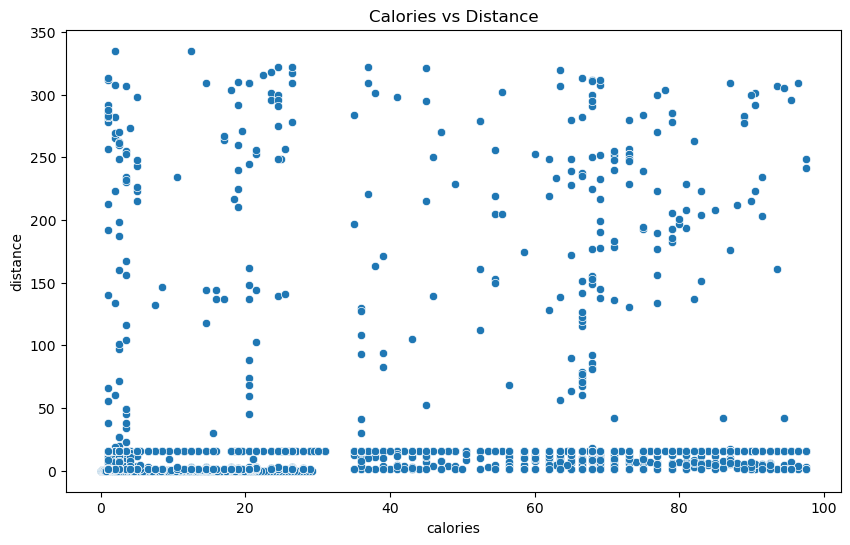

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calories', y='distance')
plt.title('Calories vs Distance')
plt.show()


The scatter plot shows a varied relationship between calories burned and distance traveled

# Data Standardization

In [11]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance'],
      dtype='object')
Categorical columns: Index(['device', 'activity'], dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

All numerical features in df[numerical_cols] are standardized. Each feature will have a mean of 0 and a standard deviation of 1.

# Training a Regression Model to predict workout intensity

1. Random Forest Regressor

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_regression = df[['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']]
y_regression = df['intensity_karvonen']

print(f"X_regression shape: {X_regression.shape}")
print(f"y_regression shape: {y_regression.shape}")

X_regression shape: (6264, 7)
y_regression shape: (6264,)


In [14]:
# Splitting into training and testing data 

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [15]:
# Initisalising Random Forest Regressor 

regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_test_reg)

In [16]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error for Intensity Prediction: {mse}")

# Calculating R-squared (R²)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R-squared (Accuracy) for Intensity Prediction: {r2}")

Mean Squared Error for Intensity Prediction: 0.0011848210043396304
R-squared (Accuracy) for Intensity Prediction: 0.9987604452891771


Inference : 
- In this, the MSE is extremely low (0.00118), meaning the errors in the predictions are very small.
- Here an R² value of 0.99876 is extremely close to 1, indicating that the model explains about 99.88% of the variance in the target variable.
- Potential overfitting

2. Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_regression = df[['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']]
y_regression = df['intensity_karvonen']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


linear_regressor = LinearRegression()


linear_regressor.fit(X_train_reg, y_train_reg)


y_pred_reg = linear_regressor.predict(X_test_reg)


mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error for Intensity Prediction: {mse}")
print(f"R² Score for Intensity Prediction: {r2}")


Mean Squared Error for Intensity Prediction: 0.042748811076616086
R² Score for Intensity Prediction: 0.9552763751165673


# Training a classification model to predict workout type

In [18]:
y_classification = df['activity']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_classification_encoded = label_encoder.fit_transform(y_classification)

print(f"y_classification shape: {y_classification_encoded.shape}")
print(f"Unique activity classes: {label_encoder.classes_}")

y_classification shape: (6264,)
Unique activity classes: ['Lying' 'Running 3 METs' 'Running 5 METs' 'Running 7 METs'
 'Self Pace walk' 'Sitting']


In [19]:

X_classification = df[['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']]
y_classification = y_classification_encoded


print(f"X_classification shape: {X_classification.shape}")
print(f"y_classification shape: {y_classification.shape}")


X_classification shape: (6264, 7)
y_classification shape: (6264,)


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train_clf, y_train_clf)

y_pred_clf = classifier.predict(X_test_clf)


In [22]:
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy for Workout Type Prediction: {accuracy}")

report = classification_report(y_test_clf, y_pred_clf, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


Accuracy for Workout Type Prediction: 0.8379888268156425
Classification Report:
                precision    recall  f1-score   support

         Lying       0.80      0.84      0.82       273
Running 3 METs       0.84      0.84      0.84       175
Running 5 METs       0.83      0.85      0.84       208
Running 7 METs       0.92      0.89      0.90       235
Self Pace walk       0.87      0.87      0.87       178
       Sitting       0.77      0.73      0.75       184

      accuracy                           0.84      1253
     macro avg       0.84      0.84      0.84      1253
  weighted avg       0.84      0.84      0.84      1253



# Generating the fitness plan

In [23]:
def generate_fitness_plan(user_data):
    
    intensity_prediction = regressor.predict([user_data])
    
    
    workout_type_prediction = classifier.predict([user_data])
    
    
    return {
        'Workout Intensity': intensity_prediction[0],
        'Workout Type': label_encoder.inverse_transform([workout_type_prediction[0]])[0]
    }


In [24]:
def get_user_input():
    age = int(input("Enter your age: "))
    weight = float(input("Enter your weight in kg: "))
    steps = float(input("Enter average daily steps: "))
    heart_rate = float(input("Enter your average heart rate: "))
    calories = float(input("Enter daily calories burned: "))
    distance = float(input("Enter average distance walked (in km): "))
    norm_heart = float(input("Enter normalized heart rate: "))
    
    
    user_data = [age, weight, steps, heart_rate, calories, distance, norm_heart]
    
    return user_data


def generate_fitness_plan(user_data):
    
    
    intensity_prediction = linear_regressor.predict([user_data])
    
    
    workout_type_prediction = classifier.predict([user_data])
    
    
    return {
        'Workout Intensity': intensity_prediction[0],
        'Workout Type': label_encoder.inverse_transform([workout_type_prediction[0]])[0]
    }


if __name__ == "__main__":
    user_data = get_user_input()
    
   
    fitness_plan = generate_fitness_plan(user_data)
    
    
    print("\nGenerated Fitness Plan:")
    print(f"Workout Intensity: {fitness_plan['Workout Intensity']}")
    print(f"Workout Type: {fitness_plan['Workout Type']}")


# Combining Regression and Classification Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['activity_encoded'] = label_encoder.fit_transform(df['activity'])

X_regression = df[['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']]
y_regression = df['intensity_karvonen']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = linear_regressor.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Mean Squared Error for Intensity Prediction: {mse}")
print(f"R² Score for Intensity Prediction: {r2}")

# Combine the intensity prediction with the original features for classification
X_classification = X_regression.copy()
X_classification['predicted_intensity'] = linear_regressor.predict(X_regression)  

y_classification = df['activity_encoded']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_clf, y_train_clf)

y_pred_clf = classifier.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)

report = classification_report(y_test_clf, y_pred_clf, target_names=label_encoder.classes_)

def get_user_input():
    age = int(input("Enter your age: "))
    weight = float(input("Enter your weight in kg: "))
    steps = float(input("Enter average daily steps: "))
    heart_rate = float(input("Enter your average heart rate: "))
    calories = float(input("Enter daily calories burned: "))
    distance = float(input("Enter average distance walked (in km): "))
    norm_heart = float(input("Enter normalized heart rate: "))
    
    user_data = [age, weight, steps, heart_rate, calories, distance, norm_heart]
    
    return user_data

def generate_fitness_plan(user_data):
    intensity_prediction = linear_regressor.predict([user_data])
    
    user_data_with_intensity = user_data + [intensity_prediction[0]]
    
    workout_type_prediction = classifier.predict([user_data_with_intensity])
    
    return {
        'Workout Intensity': intensity_prediction[0],
        'Workout Type': label_encoder.inverse_transform([workout_type_prediction[0]])[0]
    }

if __name__ == "__main__":
    user_data = get_user_input()
    fitness_plan = generate_fitness_plan(user_data)
    
    print("\nGenerated Fitness Plan:")
    print(f"Workout Intensity: {fitness_plan['Workout Intensity']}")
    print(f"Workout Type: {fitness_plan['Workout Type']}")


Mean Squared Error for Intensity Prediction: 0.04274881107661606
R² Score for Intensity Prediction: 0.9552763751165673
Accuracy for Activity Prediction: 0.8116520351157223
Classification Report:
                precision    recall  f1-score   support

         Lying       0.79      0.79      0.79       273
Running 3 METs       0.80      0.85      0.82       175
Running 5 METs       0.81      0.82      0.81       208
Running 7 METs       0.91      0.87      0.89       235
Self Pace walk       0.82      0.85      0.83       178
       Sitting       0.74      0.69      0.72       184

      accuracy                           0.81      1253
     macro avg       0.81      0.81      0.81      1253
  weighted avg       0.81      0.81      0.81      1253


Generated Fitness Plan:
Workout Intensity: 492.2748429338982
Workout Type: Running 5 METs


C:\Users\aanch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aanch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dropping unnecessary columns and handling categorical data
workout_data_cleaned = workout_data.drop(['Unnamed: 0', 'X1', 'device'], axis=1)

# Encoding categorical columns (gender: 0 for female, 1 for male and activity type)
label_encoder = LabelEncoder()
workout_data_cleaned['gender'] = label_encoder.fit_transform(workout_data_cleaned['gender'])
workout_data_cleaned['activity'] = label_encoder.fit_transform(workout_data_cleaned['activity'])

In [ ]:
# We'll modify the features used in the model based on the columns the user specified

# Selecting only the relevant columns for the new model
selected_columns = ['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']
X_new = workout_data_cleaned[selected_columns]

# Splitting the data into training and test sets using the new selected columns
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Retraining the Linear Regression model with the new features
linear_reg_model_new = LinearRegression()
linear_reg_model_new.fit(X_train_new, y_train_new)

# Making predictions on the test set
y_pred_new = linear_reg_model_new.predict(X_test_new)

# Evaluating the model
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

# Saving the new model to a .pkl file
model_filename_new = 'workout_intensity_predictor_selected_columns.pkl'
joblib.dump(linear_reg_model_new, model_filename_new)

mse_new, r2_new, model_filename_new
